<a href="https://colab.research.google.com/github/bundickm/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Michael_Bundick_DS3_sprint_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#Part 1 - Points 1 and 2 - Load and validate observation count
#Part 1 - Point 4 - Name the features
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
patients = pd.read_csv(url, names=['age', 'year', 'nodes', 'survived'])
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age         306 non-null int64
year        306 non-null int64
nodes       306 non-null int64
survived    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [13]:
#Part 1 - Point 3 - No missing values
patients.isnull().sum()

age         0
year        0
nodes       0
survived    0
dtype: int64

In [19]:
#Part 5 - Re-encode the survived feature
patients['survived'] = patients['survived'].replace(2,0)
patients.head(10) #first 2 '2's occur at index 7 and 8

,age,year,nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [18]:
#Part 1 - Completion
patients.head()

,age,year,nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [38]:
patients.describe()

,age,year,nodes,survived
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


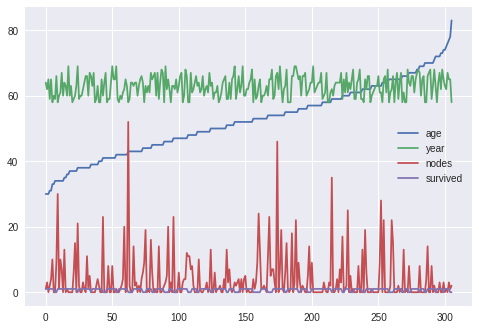

In [141]:
patients.plot();

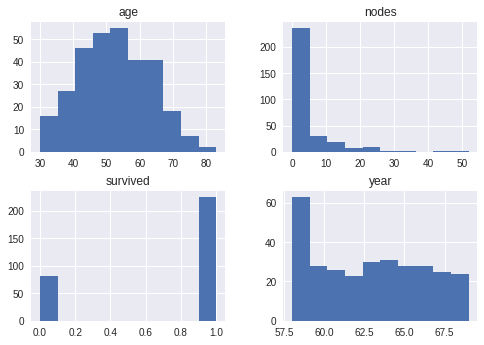

In [142]:
patients.hist();

In [0]:
#creating bins
age_bins = pd.cut(patients['age'],8)

bins = pd.IntervalIndex.from_tuples([(0,3),(4,7),(8,10),(11,20),(21,52)])
node_bins = pd.cut(patients['nodes'],bins)

year_bins = pd.cut(patients['year'],4)

In [147]:
#comparing survival against age
pd.crosstab(patients['survived'],age_bins,normalize='columns')

age,"(29.947, 36.625]","(36.625, 43.25]","(43.25, 49.875]","(49.875, 56.5]","(56.5, 63.125]","(63.125, 69.75]","(69.75, 76.375]","(76.375, 83.0]"
survived,,,,,,,,
0,0.111111,0.2,0.352941,0.30137,0.232143,0.28125,0.222222,0.666667
1,0.888889,0.8,0.647059,0.69863,0.767857,0.71875,0.777778,0.333333


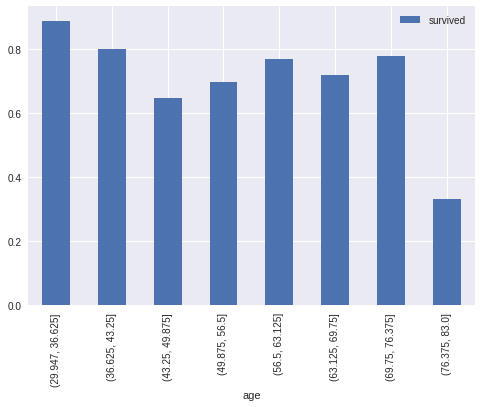

In [148]:
pd.pivot_table(patients, values='survived',index=age_bins).plot.bar();

In [149]:
#comparing survival to node count
pd.crosstab(patients['survived'], node_bins, normalize='columns')

nodes,"(0, 3]","(4, 7]","(8, 10]","(11, 20]","(21, 52]"
survived,,,,,
0,0.246914,0.45,0.555556,0.545455,0.538462
1,0.753086,0.55,0.444444,0.454545,0.461538


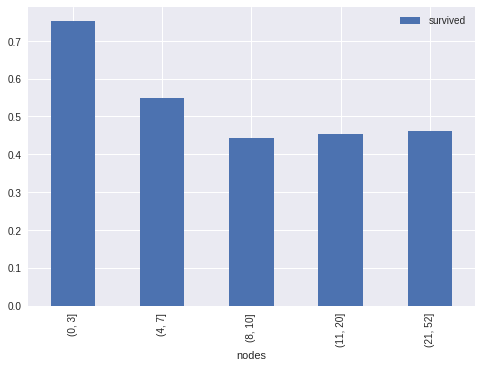

In [150]:
pd.pivot_table(patients, values='survived',index=node_bins).plot.bar();

In [151]:
#comparing survival to year
#appears to be no relationship between year and survival which is as we would expect
pd.crosstab(patients['survived'], year_bins, normalize='columns')

year,"(57.989, 60.75]","(60.75, 63.5]","(63.5, 66.25]","(66.25, 69.0]"
survived,,,,
0,0.274725,0.227848,0.310345,0.22449
1,0.725275,0.772152,0.689655,0.77551


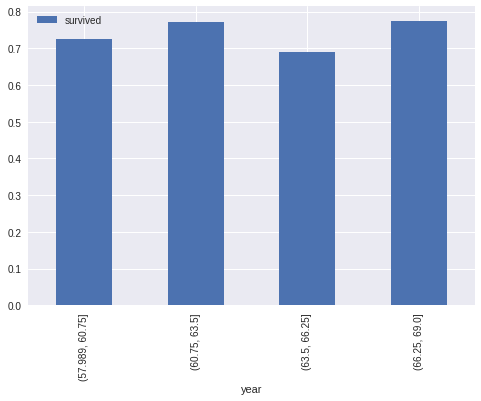

In [152]:
pd.pivot_table(patients, values='survived',index=year_bins).plot.bar();

In [153]:
#comparing age and node counts
#appears to be an increasing node count from 30 to roughly the mid 50's and then a sharp decline
pd.crosstab(age_bins, node_bins, normalize='columns')

nodes,"(0, 3]","(4, 7]","(8, 10]","(11, 20]","(21, 52]"
age,,,,,
"(29.947, 36.625]",0.061728,0.05,0.333333,0.045455,0.076923
"(36.625, 43.25]",0.172840,0.10,0.000000,0.136364,0.153846
"(43.25, 49.875]",0.160494,0.25,0.222222,0.227273,0.076923
"(49.875, 56.5]",0.320988,0.40,0.222222,0.272727,0.307692
"(56.5, 63.125]",0.135802,0.20,0.222222,0.181818,0.230769
"(63.125, 69.75]",0.061728,0.00,0.000000,0.090909,0.153846
"(69.75, 76.375]",0.049383,0.00,0.000000,0.045455,0.000000
"(76.375, 83.0]",0.037037,0.00,0.000000,0.000000,0.000000


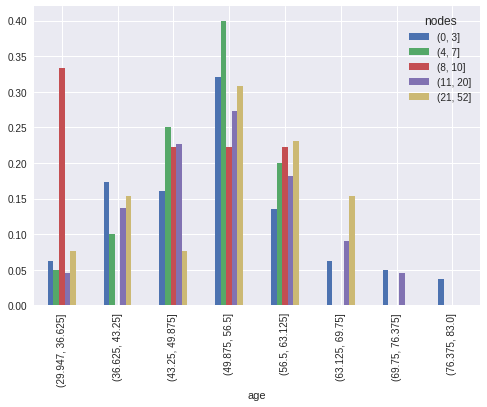

In [154]:
pd.crosstab(age_bins, node_bins, normalize='columns').plot.bar();

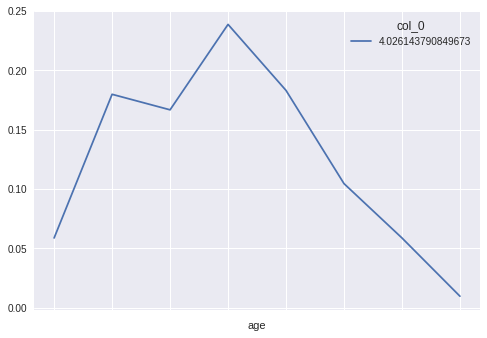

In [155]:
pd.crosstab(age_bins, patients['nodes'].mean(), normalize='columns').plot.line();

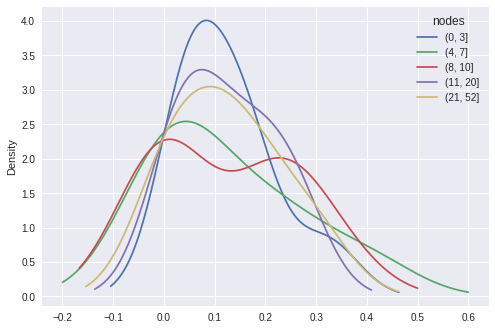

In [156]:
pd.crosstab(age_bins, node_bins, normalize='columns').plot.density();

In [157]:
pd.crosstab(year_bins, node_bins, normalize='columns')

nodes,"(0, 3]","(4, 7]","(8, 10]","(11, 20]","(21, 52]"
year,,,,,
"(57.989, 60.75]",0.407407,0.15,0.333333,0.227273,0.230769
"(60.75, 63.5]",0.234568,0.35,0.222222,0.318182,0.461538
"(63.5, 66.25]",0.185185,0.25,0.444444,0.363636,0.153846
"(66.25, 69.0]",0.172840,0.25,0.000000,0.090909,0.153846


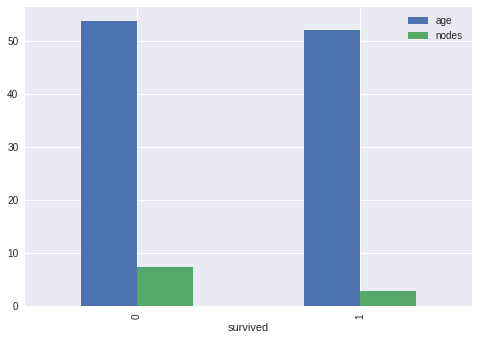

In [158]:
pd.pivot_table(patients, values=['age', 'nodes'],index='survived').plot.bar()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

###Q1: What is at least one feature that looks to have a positive relationship with survival?

Age seems to have a positive impact on survival - generally, the younger you are, the more likely you are to survive 5+ years after undergoing breast cancer surgery. We can see in the table below the chance of survival starts at 89% and decreases as low as 33%. We do see a decrease in survival rates during the age range of mid 30's to 40's, but as we will explore below this is likely due to a connection to node counts.

In [118]:
#comparing survival against age
pd.crosstab(patients['survived'],age_bins,normalize='columns')

age,"(29.947, 36.625]","(36.625, 43.25]","(43.25, 49.875]","(49.875, 56.5]","(56.5, 63.125]","(63.125, 69.75]","(69.75, 76.375]","(76.375, 83.0]"
survived,,,,,,,,
0,0.111111,0.2,0.352941,0.30137,0.232143,0.28125,0.222222,0.666667
1,0.888889,0.8,0.647059,0.69863,0.767857,0.71875,0.777778,0.333333


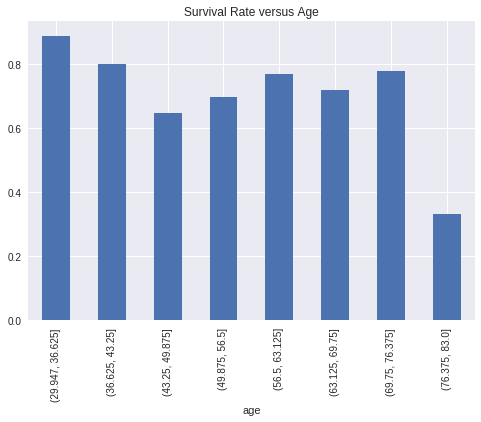

In [136]:
pd.pivot_table(patients, values='survived',index=age_bins).plot.bar(title="Survival Rate versus Age", legend=False);

###Q2: What is at least one feature that looks to have a negative relationship with survival?

As node count increases the survival rate drops from 70% to 50% with outliers in the 31-52 nodes range (see Node Counts below).

In [159]:
#Node Counts versus survival rate
pd.crosstab(patients['survived'], node_bins, normalize='columns')

nodes,"(0, 3]","(4, 7]","(8, 10]","(11, 20]","(21, 52]"
survived,,,,,
0,0.246914,0.45,0.555556,0.545455,0.538462
1,0.753086,0.55,0.444444,0.454545,0.461538


In [171]:
#Node Counts
node_bins.value_counts()

(0, 3]      81
(11, 20]    22
(4, 7]      20
(21, 52]    13
(8, 10]      9
Name: nodes, dtype: int64

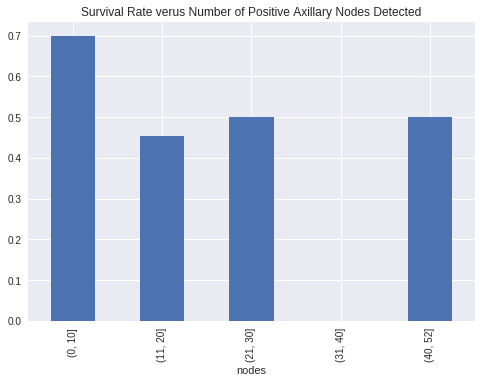

In [138]:
pd.pivot_table(patients, values='survived',index=node_bins).plot.bar(
               title='Survival Rate verus Number of Positive Axillary Nodes Detected',
               legend=False);

###Q3: How are those two features related with each other, and what might that mean?

From age 30 to roughly the late 50's the number of nodes increases and then the trend reverses from the late 50's until 83. We know from above that node count decreases survival rate and that age also decreases survival rate so we should expect to see a high survival rate at 30 (low node count, low age), with a decrease up until the 50's (increasing node count, increasing age), and then a smaller upward trend before dropping off again in old age (low node count impact on survival reducing with age increase). Of course, this matches our data of age versus survival rate above.

In [130]:
pd.crosstab(age_bins, node_bins, normalize='columns')

nodes,"(0, 10]","(11, 20]","(21, 30]","(31, 40]","(40, 52]"
age,,,,,
"(29.947, 36.625]",0.076923,0.045455,0.1,0.0,0.0
"(36.625, 43.25]",0.161538,0.136364,0.1,0.0,0.5
"(43.25, 49.875]",0.176923,0.227273,0.1,0.0,0.0
"(49.875, 56.5]",0.315385,0.272727,0.3,0.0,0.5
"(56.5, 63.125]",0.146154,0.181818,0.2,1.0,0.0
"(63.125, 69.75]",0.053846,0.090909,0.2,0.0,0.0
"(69.75, 76.375]",0.046154,0.045455,0.0,0.0,0.0
"(76.375, 83.0]",0.023077,0.000000,0.0,0.0,0.0


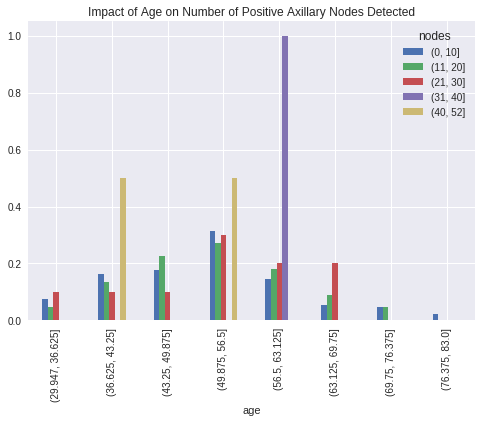

In [139]:
pd.crosstab(age_bins, node_bins, normalize='columns').plot.bar(title='Impact of Age on Number of Positive Axillary Nodes Detected');